# 7. inheritance

Last updated 20190530THR1300 20180602SAT1630 20180520SUN2230

## 7.1 학습내용

### 7.1.1 목표

* 상속을 구현할 수 있다.
* 인터페이스 다형성을 사용할 수 있다.
* 클래스 다형성을 사용할 수 있다.
* 연관관계, 상속관계를 구별해서 사용할 수 있다.

목차
* 7.1 상속
* 7.2 Constructor
* 7.3 Fields
* 7.4 Interface 상속
* 7.5 abstract class
* 7.6 Polymorphism
* 7.7 equals

### 7.1.2 문제

* 문제 oo-1: 도형을 선택하여 그룹을 만들 수 있다. 선택된 도형을 알아내기. (연관 vs 상속)
* 문제 oo-2: 상속을 사용하여 거북이를 구현한다 (상속, protected).
* 문제 oo-3: 원의 면적을 계산하기 (상속)
* 문제 oo-4: 클래스 상속을 사용하여 도형의 면적을 구하기 (abstract class)
* 문제 oo-5: 객체를 배열로 저장해서, sayHello() (객체의 배열)
* 문제 oo-6: 도형을 다형적으로 면적 계산하기 (다형성, instatnceOf)
* 문제 oo-7: equals를 구현한다.
* 문제 oo-8: 강의시간표를 구현한다 (NullSubjet)

### 7.1.3 연습

* mini: **game** 상속을 사용하여 윷놀이, 주사위를 할 수 있게 수정한다.
* mini: **shape**

## 7.2 상속

### 7.2.1 상속이란?

객체지향으로 프로그래밍을 한다면 빼놓을 수 없는 특징이 상속 **inheritance**이다.
상속은 한 클래스가 다른 클래스로부터 **모든 특징이나 기능**을 가져오고,
거기에 자신의 **새로운 특징이나 기능을 덧붙여 추가**하는 구현 방식이다.
이 때 자신의 특징이나 기능을 물려주는 측을 **부모**, 물려받는 측을 **자식**이라고 하고
이러한 부모클래스-자식클래스의 계층구조로 상속을 표현할 수 있다.
* **부모클래스**는 superclass, base class라고 한다.
* **자식클래스**는 subclass, derived class라고 한다.
* 이러한 계층구조를 통해 **공통되는 부분을 부모클래스**에서, **다른 부분은 자식클래스**에서 구현한다.

### 7.2.2 자식은 부모를 대체할 수 있어야 한다.

#### 부모 - (부모 $\cap$자식) = $\emptyset$

상속을 집합으로 이해해 보자.
부모와 자식의 공통부분은 부모와 동일하다. 즉, 부모의 **모든 특징이나 기능을 물려받아야** 한다.

* 자식클래스는 부모클래스의 모든 요소 element를 가져야 한다. 집합의 요소는 속성, 함수이다.
* 부모클래스는 자식클래스와 공통부분을 가진다.
* 공통적이지 않은 요소는 자식클래스가 가진다.

**LSP Liscov Substitution Principle** 이란 상속에서 지켜야 하는 원칙이다.

![alt text](figures/8_liscov.png "LSP")

#### 정사각형과 직사각형

잘 알려진 예로 직사각형과 정사각형을 들 수 있다.
**정사각형이 직사각형을 상속**했다고 하자. 그렇다면 부모 직사각형은 자식 정사각형으로 **대체 substitution 하더라도 아무런 문제가 없어야** 한다.
그러나 정사각형은 너비, 높이가 같고 너비가 변경이 되면 높이도 같이 변경이 되는 특징을 가지고 있다.
반면에 **직사각형은 너비, 높이가 똑같이 변경되면 직사각형이 아니다**.

### 7.2.2 다중상속

상속은 **여러 부모**에게서 받을 수 있다.
생물학적으로는 여러 부모라는 말이 성립하지 않지만, 객체지향에서는 가능하다.
이를 다중 상속이라고 하며, 복수의 부모로부터 특성이나 기능을 물려받는 것을 말한다.
상속에서 여러 부모를 가질 수 있지만, **자바에서의 다중 상속은 없다**.

다중상속은 물려받을 재정의된 함수가 여럿 있을 경우 문제가 된다.
양서류는 어류와 파충류에서 다중상속을 받고 있다.
양서류는 물에서 태어나, 육지생활을 하기 때문에 어류와 파충류의 특징을 부분적으로 가진다.
생물학적으로는 설명이 되지만, 자바에서는 문제가 된다. 이런 문제를 **Diamond Problem**이라고 한다.
즉 Object클래스의 **toString()** 함수를 호출하려고 하면, 어느 한 쪽을 부정해야 한다.
또 부모클래스의 **equals()** 함수를 호출하려하면 어느 한쪽 함수만을 선택적으로 물려받을 수 없다는 문제가 있다.

![alt text](figures/8_diamond.png "Multiple inheritance")

## 7.3 함수

### 7.3.1 커피빈 사례

커피빈 클래스를 구현해 보자.
* 커피빈은 Robusta, Arabica로 나뉜다.
* **Robusta**는 **인스턴트** 커피를 만들 때 주로 사용되며, **아프리카**, **아시아** 지역에서 생산된다.
* **Arabica**는 **품질이 좋은** 커피를 만드는 재료로 사용되며, 주 생산지는 **라틴 아메리카** 지역이다.
* 이 두 클래스는 서로 공통점이 많다. 클래스로 구현하려면, 속성 및 함수가 서로 비슷한 점이 많다.

difference | Robusta | Arabica
----------|----------|----------
altitude(m) | 0-800 | 600-2200
caffeine | more (2.2%) | less (1.2%)
price | half less | more
shape | more circular | oval
production area | Africa, Asia (vietnam) | Latin Amerca (Brazail, Colombia)
primary use | **instant** | **gourmet**

### 7.3.2 UML로 나타내기

상속은 빈삼각형 화살표로 나타낸다.
Arabica와 Robusta는 모두 커피빈이므로 **동일한 부모**를 가진다.
이를 상속이라고 하고, **부모를 향하는 빈삼각형 화살표**로 표현한다.
그러나 서로 다른 특징을 가지며, 커피를 제조하는 공정도 다르기 때문에 분기하여 존재한다.

In [1]:
import iplantuml

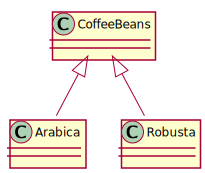

In [2]:
%%plantuml
@startuml
class CoffeeBeans
class Arabica
class Robusta
CoffeeBeans <|-- Arabica
CoffeeBeans <|-- Robusta
@enduml

### 7.3.3 상속 구현

커피빈 클래스 **CoffeeBeans**를 구현한다.
상속을 이해하기 위해 단순한 사례를 사용한다.
* CoffeeBeans는 부모클래스, Arabica는 자식클래스이다.
* 그 관계는 **```extends```**로 구현한다.

```java
class Arabica extends CoffeeBeans
```

In [1]:
class CoffeeBeans {
    String species="Coffee";
    void print() {
        System.out.println(species);
    }
    void setSpecies(String s) {
        species=s;
    }
}
class Arabica extends CoffeeBeans  {

}
class Robusta extends CoffeeBeans {
    String species="Robusta";
}

 class CoffeeBeans {
     String species="Coffee";
     void print() {
         System.out.println(species);
     }
     void setSpecies(String s) {
         species=s;
     }
 }
|  Added class CoffeeBeans

 class Arabica extends CoffeeBeans  {
 
 }
|  Added class Arabica

 class Robusta extends CoffeeBeans {
     String species="Robusta";
 }
|  Added class Robusta



각 클래스의 객체 instance를 생성해 보자.

In [2]:
CoffeeBeans c=new CoffeeBeans();
Arabica a=new Arabica();
Robusta r=new Robusta();

 CoffeeBeans c=new CoffeeBeans();
|  Added variable c of type CoffeeBeans with initial value CoffeeBeans@598067a5

 Arabica a=new Arabica();
|  Added variable a of type Arabica with initial value Arabica@42dafa95

 Robusta r=new Robusta();
|  Added variable r of type Robusta with initial value Robusta@402a079c



**getClass()** 함수로 어떤 클래스에서 객체가 생성되었는지 알아볼 수 있다.

In [3]:
System.out.println("c의 클래스는: "+c.getClass());

 System.out.println("c의 클래스는: "+c.getClass());
c의 클래스는: class REPL.$REPL9$CoffeeBeans



instanceof 연산자는 객체가 어느 클래스에서 생성되었는지 알아볼 수 있다.
instanceof 연산자의 결과는 boolean으로 true, false를 반환한다.
상속관계로 맺어진 **부모 CoffeeBeans의 객체이면서 또한 Arabica의 객체**이기도 하다.

In [4]:
if(a instanceof CoffeeBeans || a instanceof Arabica ) {
    System.out.println("a는 CoffeeBeans클래스이거나 Arabica의 객체이다");
} else {
    System.out.println("a는 CoffeeBeans클래스 또는 Arabica의 객체가 아니다");
}

 if(a instanceof CoffeeBeans || a instanceof Arabica ) {
     System.out.println("a는 CoffeeBeans클래스이거나 Arabica의 객체이다");
 } else {
     System.out.println("a는 CoffeeBeans클래스 또는 Arabica의 객체가 아니다");
 }
a는 CoffeeBeans클래스이거나 Arabica의 객체이다



### 7.3.4 슈퍼클래스 함수를 호출

자식클래스는 부모클래스의 함수를 사용할 수 있다.
앞서 부모 CoffeeBeans는 **```print()```** 함수를 정의했지만, Arabica 및 Robusta는 자신의 ```print()``` 함수를 정의하지 않았다.
상속관계인 경우, **부모클래스의 ```print()``` 함수**를 호출한다.

In [5]:
c.print();
a.print();
r.print();

 c.print();
Coffee

 a.print();
Coffee

 r.print();
Coffee



### 7.3.5 슈퍼클래스 함수를 재정의

앞서 **```print()```** 함수를 자식클래스에서 구현해보자.
즉 부모클래스 CoffeeBeans가 가지고 있는 print() 함수를 자식클래스에서 구현한다.
부모클래스의 함수이름, 함수입력변수, 반환변수를 동일하게 한다.
이 경우 부모클래스와 함수를 동일하게 구현하려면 **```@Override```**라고 붙여준다.
이를 **java annotation**이라고 한다.

> 자바 **annotations**
>
> 1.5부터 도입된 문법이다.
> **```@```**로 시작하고, 현재 기본으로 제공하는 annotations는 **```@Override, @Deprecated, @SuppressWarnings```**이다.
> 프로그램에 직접적 영향은 없다.
> 소스코드에 넣어 사용하면 함수이름 및 시그니처를 잘못써서 발생하는 문법 오류 및 오타를 막아준다.

In [3]:
class Arabica extends CoffeeBeans  {
    @Override
    void setSpecies(String s) {
        species=s;
    }
    @Override
    void print() {
        System.out.println("Arabica coffee..");
    }
}

 class Arabica extends CoffeeBeans  {
     @Override
     void setSpecies(String s) {
         species=s;
     }
     @Override
     void print() {
         System.out.println("Arabia coffee..");
     }
 }
|  Replaced class Arabica
|    Update replaced variable a, reset to null
|    Update overwrote class Arabica



Arabica 객체의 ```print()``` 함수를 호출하여 보자.
* Arabica 클래스의 경우, ```print()``` 함수를 재정의하였고, 이 함수가 호출된다.
* Robusta 클래스는 재정의한 함수가 없으므로 부모클래스의 ```print()``` 함수를 호출한다.

In [4]:
Arabica a1=new Arabica();

 Arabica a1=new Arabica();
|  Added variable a1 of type Arabica with initial value Arabica@1ce92674



In [5]:
a1.print();
r.print();

 a1.print();
Arabia coffee..

 r.print();
Coffee



이를 **```재정의 overriding```**라고 하며 앞서 설명했던 overloading과 비교해보자.
* 상속관계에서 함수를 정의할 때, **함수 명은 같지만 입력변수가 다른** 경우 overloading이라고 한다. 자식클래스에서 부모클래스의 ```print()``` 함수를 다르게 ```print(String s)```로 구현하는 경우이다.
* 부모클래스의 ```print()```를 자식클래스에서 재정의하는 경우는 앞서 설명한 overriding이다. 이럴 경우, 컴파일 시점에 어느 함수를 사용할지 결정될 수 없고, **실행하면서 해당하는 객체가 결정**된다.

구분 | overriding | overloading
--------|--------|--------
함수이름 | 같다 | 같다
입력변수 argument | 같다 | 다르다
구별 시점 | 실행 runtime | 컴파일 compile time

In [6]:
class Arabica extends CoffeeBeans  {
    @Override
    void setSpecies(String s) {
        species=s;
    }
    @Override
    void print() {
        System.out.println("Arabica coffee..");
    }
    void print(String s) {
        System.out.printf("%s: %s", species, s);
    }
}

 class Arabica extends CoffeeBeans  {
     @Override
     void setSpecies(String s) {
         species=s;
     }
     @Override
     void print() {
         System.out.println("Arabica coffee..");
     }
     void print(String s) {
         System.out.printf("%s: %s", species, s);
     }
 }
|  Replaced class Arabica
|    Update replaced variable a, reset to null
|    Update replaced variable a1, reset to null
|    Update overwrote class Arabica



Overloading 함수 **```print("gourmet quality")```**를 호출한다.
아직 부모클래스 CoffeeBeans의 species 값을 출력하고 있다.
```Coffee: instant quality```

In [7]:
Arabica a2=new Arabica();
a2.print("gourmet quality");

 Arabica a2=new Arabica();
|  Added variable a2 of type Arabica with initial value Arabica@56ac3a89

 a2.print("gourmet quality");
Coffee: gourmet quality


이번에는 overriding 함수 **```setSpecies("Arabica")```**를 실행한 후 위와 동일한 출력을 해보자. ```Arabica: instant quality```로 변경된 값 Arabica로 출력한다.

In [8]:
a2.setSpecies("Arabica");
a2.print("qourmet quality");

 a2.setSpecies("Arabica");

 a2.print("qourmet quality");
Arabica: qourmet quality


#### casting

앞서 print() 함수의 overriding을 설명하면서 객체가 실행시점에 결정한다는 설명을 하였다.
아래와 같이 **```CoffeeBeans ca```**라고 선언하면 **ca에 어느 객체가 할당이 되는지** 아직 모른다.

In [9]:
CoffeeBeans ca;

 CoffeeBeans ca;
|  Added variable ca of type CoffeeBeans



아래와 같이 ca는 부모클래스의 객체이고, 여기에 Arabica를 넣는다.
그렇다면 부모클래스로 **upcasting**을 하는 것이다.
그리고 재정의함수를 호출하는 경우, 부모의 함수를 호출할까? 자신의 함수를 호출할까?
함수가 재정의 되어 있는 경우, **자신의 재정의된 함수를 호출**한다.

In [10]:
ca = new Arabica();
ca.print();

 ca = new Arabica();
|  Variable ca has been assigned the value Arabica@5702b3b1

 ca.print();
Arabica coffee..



그러나 부모클래스가 가지고 있지 않고 **Arabica 고유 함수는 ca로 upcasting하면서 제거**된다는 점에 주의한다.
따라서 **```ca.print("instant quality")```**는 제거되었기 때문에 오류가 발생한다.

In [11]:
ca.print("gourmet quality");

 ca.print("gourmet quality");
|  Error:
|  method print in class CoffeeBeans cannot be applied to given types;
|    required: no arguments
|    found: java.lang.String
|    reason: actual and formal argument lists differ in length
|  ca.print("gourmet quality");
|  ^------^



ca라는 instance는 CoffeeBeans일 수도 있고 Arabica이기도 하다.
```instanceof```를 사용해서 출력을 하면 알 수 있다.

In [12]:
System.out.println("ca의 클래스:"+ca.getClass());
if (ca instanceof CoffeeBeans || ca instanceof Arabica) {
    System.out.println("ca는 CoffeeBeans클래스이거나 Arabica의 객체이다.");
} else {
    System.out.println("ca는 CoffeeBeans클래스 또는 Arabica의 객체가 아니다.");
}

 System.out.println("ca의 클래스:"+ca.getClass());
ca의 클래스:class REPL.$REPL10E$Arabica

 if (ca instanceof CoffeeBeans || ca instanceof Arabica) {
     System.out.println("ca는 CoffeeBeans클래스이거나 Arabica의 객체이다.");
 } else {
     System.out.println("ca는 CoffeeBeans클래스 또는 Arabica의 객체가 아니다.");
 }
ca는 CoffeeBeans클래스이거나 Arabica의 객체이다.



#### visibility

부모클래스의 함수를 **```private```**으로 하는 경우는 자식클래스라고 해도 사용할 수 없다.
상속관계에서 부모클래스의 속성을 protected로 해서 자식클래스가 사용할 수 있게 한다.

In [12]:
class CoffeeBeans {
    String species="Coffee";
    void print() {
        System.out.println(species);
    }
    private void setSpecies(String s) {
        species=s;
    }
}

class Robusta extends CoffeeBeans {
    @Override
    void print() {
        System.out.println("Robusta coffee..");
    }
    void print(String s) {
        System.out.printf("%s: %s", species, s);
    }
}

 class CoffeeBeans {
     String species="Coffee";
     void print() {
         System.out.println(species);
     }
     private void setSpecies(String s) {
         species=s;
     }
 }
|  Replaced class CoffeeBeans
|    Update replaced variable ca, reset to null
|    Update replaced class Arabica which cannot be referenced until this error is corrected: 
|      method does not override or implement a method from a supertype
|          @Override
|          ^-------^
|    Update replaced class Robusta
|    Update replaced variable c, reset to null
|    Update replaced variable a2 which cannot be referenced until class Arabica is declared
|    Update replaced variable a which cannot be referenced until class Arabica is declared
|    Update replaced variable a1 which cannot be referenced until class Arabica is declared
|    Update replaced variable r, reset to null
|    Update overwrote class CoffeeBeans

 

 class Robusta extends CoffeeBeans {
     @Override
     void print() {
        

**```setSpecies()```** 함수는 private으로 설정되었기 때문에 사용할 수 없다.
따라서 Robusta가 자식클래스라고 해도 사용할 수 없고, **Coffee: instant quality**로 출력된다.

In [13]:
Robusta r1=new Robusta();
r1.setSpecies("Robusta");

 Robusta r1=new Robusta();
|  Added variable r1 of type Robusta with initial value Robusta@1e127982

 r1.setSpecies("Robusta");
|  Error:
|  cannot find symbol
|    symbol:   method setSpecies(java.lang.String)
|  r1.setSpecies("Robusta");
|  ^-----------^



따라서 **```r1.print("instant quality")```** 출력에서 species는 변경되지 않는다.

In [14]:
r1.print("instant quality");

 r1.print("instant quality");
Coffee: instant quality


그렇다면 속성의 권한을 **protected**로 변경해 보자.
권한의 변경은 **번호키를 사용하는 현관문**으로 비유하면 쉽게 이해할 수 있다.
현관문 비밀번호는 가족이나 같은 집에 사는 사람들만 사용권한을 가질 수 있다.

비유 | 설명
-----|-----
가족 | 상속관계의 자식클래스는 protected를 사용하는 권한이 있다.
같은 집에 사는 사람 | 동일한 패키지에 속하는 클래스는 protected를 사용하는 권한이 있다.

In [15]:
class CoffeeBeans {
    String species="Coffee";
    void print() {
        System.out.println(species);
    }
    protected void setSpecies(String s) {
        species=s;
    }
}
class Robusta extends CoffeeBeans {
    @Override
    void print() {
        System.out.println("Robusta coffee..");
    }
    void print(String s) {
        System.out.printf("%s: %s", species, s);
    }
}

 class CoffeeBeans {
     String species="Coffee";
     void print() {
         System.out.println(species);
     }
     protected void setSpecies(String s) {
         species=s;
     }
 }
|  Replaced class CoffeeBeans
|    Update replaced variable ca, reset to null
|    Update modified class Arabica which cannot be referenced until this error is corrected: 
|      setSpecies(java.lang.String) in Arabica cannot override setSpecies(java.lang.String) in CoffeeBeans
|        attempting to assign weaker access privileges; was protected
|          @Override
|          ^--------...
|    Update replaced class Robusta
|    Update replaced variable c, reset to null
|    Update modified variable a2 which cannot be referenced until class Arabica is declared
|    Update modified variable a which cannot be referenced until class Arabica is declared
|    Update modified variable a1 which cannot be referenced until class Arabica is declared
|    Update replaced variable r1, reset to null
|    Update 

**protected** 속성을 사용하면 재정의한 **```setSpecies()```** 함수를 호출할 수 있다. 따라서 출력문도 Robusta

In [16]:
Robusta r2=new Robusta();

 Robusta r2=new Robusta();
|  Added variable r2 of type Robusta with initial value Robusta@2ac273d3



In [17]:
r2.setSpecies("Robusta");

 r2.setSpecies("Robusta");



In [18]:
r2.print("instant quality");

 r2.print("instant quality");
Robusta: instant quality


## 7.4 Constructor

생성자는 **상속되지 않는다**.
생성자는 객체를 생성하는 목적으로 사용하며, 클래스명과 동일한 명칭의 함수이다.
생각해 보면, 부모 생성자가 동일한 명칭으로 자식에서 사용될 수가 없는 것이다.
상속관계에서 생성자를 정의할 경우, **자식 클래스는 생성자를 새로 정의**해야 하고 부모클래스의 생성자를 사용하려면 **super** 명령어를 사용할 수 있다.

### 7.4.1 도형 사례

도형 사례를 통해 생성자를 이해해 보자.
부모클래스 **사각형**을 구현해 보자. 사각형은 너비, 높이를 가진다.


In [4]:
import iplantuml

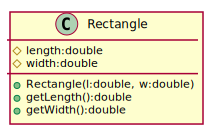

In [5]:
%%plantuml
@startuml
class Rectangle {
    length:double
    width:double
    +Rectangle(l:double, w:double)
    +getLength():double
    +getWidth():double
}
@enduml

In [19]:
class Rectangle {
    double length;
    double width;
    public Rectangle(double l, double w) {
        this.length=l;
        this.width=w;
    }
    public double getLength() {
        return length;
    }
    public double getWidth() {
        return width;
    }
}

 class Rectangle {
     double length;
     double width;
     public Rectangle(double l, double w) {
         this.length=l;
         this.width=w;
     }
     public double getLength() {
         return length;
     }
     public double getWidth() {
         return width;
     }
 }
|  Added class Rectangle



**Cube** 하위클래스를 만들어 보자.
사각형 클래스로부터 **Cube 클래스를 상속**해서 만들어 보자.
덧붙여 **높이를 추가**하면 육면체가 된다.
**직육면체**는 Length × Width × Height가 서로 다른다.
**정육면체 (Square Prism)**는 Length × Width × Height가 모두 동일하다.
생성자를 정의해서 부모클래스 **Rectangle의 길이, 너비를 사용**할 수 있게 하자.

In [1]:
import iplantuml

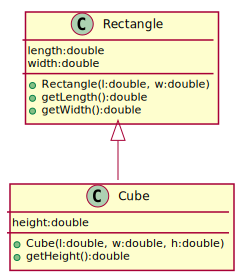

In [3]:
%%plantuml
@startuml
class Rectangle {
    length:double
    width:double
    +Rectangle(l:double, w:double)
    +getLength():double
    +getWidth():double
}
class Cube {
    height:double
    +Cube(l:double, w:double, h:double)
    +getHeight():double
}
Rectangle <|-- Cube
@enduml

자식클래스 Cube의 생성자는 매개변수가 3개이다.
이 가운데 2개는 부모클래스의 요소이다.
앞서 설명한 바와 같이 부모 생성자는 상속되지 않는다.
**super()**로 부모클래스의 생성자를 호출한다.

In [ ]:
# %load src/com/sd/select/Cube.java
package com.sd.select;
public class Cube extends Rectangle {
    double height;
    public Cube(double l, double w, double h) {
        super(l,w);
        this.height=h;
    }
    public double getHeight() {
        return height;
    }
}


In [21]:
Cube c=new Cube(10.0,20.0,30.0);

 Cube c=new Cube(10.0,20.0,30.0);
|  Replaced variable c of type Cube with initial value Cube@4e9ba398
|    Update overwrote variable c



* 상속받은 함수도 모두 호출할 수 있다.

In [22]:
c.getLength();

 c.getLength();
|  Expression value is: 10.0
|    assigned to temporary variable $31 of type double



## 7.5 Fields

클래스가 가지는 속성 또는 함수는 자신의 것이므로, **자신 외에는 누구도 사용할 수 없게** 하는 것이 좋다.
다른 클래스가 사용한다면 최소한으로 허락되도록, **Least Privilege**를 지켜서 설정해야 한다.
상속관계에서 자식클래스는 부모의 속성을 사용할 수 있다.
그러나 가시성을 제한하면, 자식클래스에서 사용할 수 없다.

권한의 구분 | 설명
-----|-----
private | 상속관계에서 자식클래스가 사용할 수 없다.
protected | 상속관계에서 자식클래스가 사용할 수 있다.


### 7.3.1 protected 상속

protected 속성은 **동일한 패키지** 또는 **상속관계**에서 사용할 수 있다.
앞서 구현한 CoffeeBeans의 속성을 **private**으로 구현하면 자식클래스에서 사용할 수 없다.

In [24]:
class CoffeeBeans {
    private String species="Coffee";
    void print() {
        System.out.println(species);
    }
    void setSpecies(String s) {
        species=s;
    }
}

 class CoffeeBeans {
     private String species="Coffee";
     void print() {
         System.out.println(species);
     }
     void setSpecies(String s) {
         species=s;
     }
 }
|  Modified class CoffeeBeans
|    Update overwrote class CoffeeBeans



자식클래스 **```Robusta print()```** 함수에서 **private**인 species를 사용하면 **오류**가 발생한다.

In [27]:
class Robusta extends CoffeeBeans {
    @Override
    void print() {
        System.out.printf("%s overriding coffee..",species);
    }
}

 }
|  Error:
|  cannot find symbol
|    symbol:   class CoffeeBeans
|  class Robusta extends CoffeeBeans {
|                        ^---------^
|  Error:
|  method does not override or implement a method from a supertype
|      @Override
|      ^-------^
|  Error:
|  cannot find symbol
|    symbol:   variable species
|          System.out.printf("Exception in thread "main" java.util.MissingFormatArgumentException: Format specifier '%s'
	at java.util.Formatter.format(java.base@9-internal/Formatter.java:2524)
	at java.io.PrintStream.format(java.base@9-internal/PrintStream.java:974)
	at java.io.PrintStream.printf(java.base@9-internal/PrintStream.java:873)
	at jdk.internal.jshell.tool.JShellTool.rawout(jdk.jshell@9-internal/JShellTool.java:230)
	at jdk.internal.jshell.tool.JShellTool.hard(jdk.jshell@9-internal/JShellTool.java:240)
	at jdk.internal.jshell.tool.JShellTool.lambda$handleEvent$70(jdk.jshell@9-internal/JShellTool.java:1832)
	at java.util.ArrayList$ArrayListSpliterator.forEachRem

In [ ]:
# %load src/com/sd/select/Rectangle.java
package com.sd.select;
public class Rectangle {
    protected double length;
    protected double width;
    protected boolean isSelected;
    public Rectangle(double l, double w) {
        this.length=l;
        this.width=w;
    }
    public double getLength() {
        return length;
    }
    public double getWidth() {
        return width;
    }
    public void setSelected(boolean b) {
        isSelected=b;
    }
    public boolean getSelected() {
        return isSelected;
    }
}


In [29]:
Rectangle myrect=new Rectangle(10.0, 20.0)
myrect.getLength();
myrect.setSelected(false);
myrect.getSelected();

 Rectangle myrect=new Rectangle(10.0, 20.0)
|  Added variable myrect of type Rectangle with initial value Rectangle@239963d8

 myrect.getLength();
|  Expression value is: 10.0
|    assigned to temporary variable $3 of type double

 myrect.setSelected(false);

 myrect.getSelected();
|  Expression value is: false
|    assigned to temporary variable $5 of type boolean



**protected field**는 다른 클래스에서 출력할 수 있을까? 상속관계에서는 출력할 수 있다. 
또는 동일한 패키지에서도 사용할 수 있다. **Pyramid 클래스**는 Rectangle 클래스와 **동일한 패키지**에 있고, 따라서 **protected로 설정된 length 속성을 사용**할 수 있다.

In [30]:
class Pyramid {
    Rectangle myrect=new Rectangle(10.0, 20.0);
    void printLength() {
        System.out.println("Rectangle length:"+myrect.getLength());
    }
}

 class Pyramid {
     Rectangle myrect=new Rectangle(10.0, 20.0);
     void printLength() {
         System.out.println("Rectangle length:"+myrect.getLength());
     }
 }
|  Added class Pyramid



In [31]:
Pyramid p=new Pyramid();
p.printLength();

 Pyramid p=new Pyramid();
|  Added variable p of type Pyramid with initial value Pyramid@1ce92674

 p.printLength();
Rectangle length:10.0



## 문제 oo-1: 도형을 선택하여 그룹을 만들 수 있다. 선택된 도형을 알아내기.

### 문제
그림판 프로그램에서 도형을 선택하는 경우가 있다.
선택한 도형을 **그룹으로 만들어 이동하거나, 삭제, 복사**하려면 필요한 기능이다.
이러한 **선택은 누가 해야** 하는지 생각해보자.

### 해결

#### 출석

출석문제를 생각해보자. 학생은 수강하는 강좌에 출석을 한다. 교수는 강좌가 시작하면 호명을 해서 출석부에 기재를 할 뿐 실제 지각하거나 결석하는지는 학생 당사자가 알 수 있다.

참여객체 | 설명
-----|-----
학생 | 학생이 출석을 한다.
교수 | 교수는 학생의 출석을 학생을 통해서 알고, 출석부 기재를 한다. 

#### 도형선택

도형선택의 문제로 옮겨보자.

참여객체 | 설명
-----|-----
도형 | 출석문제에서 학생과 같은 역할을 한다. 도형 자신이 선택되었는지는 스스로 아는 것이 자연스럽다.
선택 | 출석문제에서 출석부와 같이, 선택된 것을 기록하는 객체이다.


### 도형의 구현

* 도형은 상속으로 구현할 수 있다.

구분 | isa | hasa
-------|-------|-------
관계 | 상속 | 연관, 포함
언제 사용 | 모든 것을 사용할 경우 | 일부만 사용할 경우

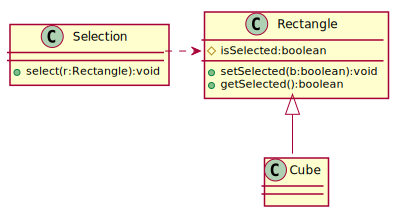

In [7]:
%%plantuml
@startuml
class Rectangle {
    #isSelected:boolean
    +setSelected(b:boolean):void
    +getSelected():boolean
}
class Cube
Rectangle <|-- Cube
@enduml

### selection의 구현


* Selection클래스는 도형을 변경하기 위해 선택하는 기능을 가지고 있다.
* 도형을 선택한 경우, setSelected()함수를 사용한다. 

In [ ]:
%%plantuml
@startuml
class Rectangle {
    #isSelected:boolean
    +setSelected(b:boolean):void
    +getSelected():boolean
}
class Cube
class Selection {
    +select(r:Rectangle):void
}
Rectangle <|-- Cube
Selection .right.> Rectangle
@enduml

In [20]:
class Selection {
    Selection(){}
    public void select(Rectangle r) {
        r.setSelected(true);
        System.out.println("selected: "+r.isSelected);
    }
}

 class Selection {
     Selection(){}
     public void select(Rectangle r) {
         r.setSelected(true);
         System.out.println("selected: "+r.isSelected);
     }
 }
|  Added class Selection



In [21]:
Selection s=new Selection();

 Selection s=new Selection();
|  Added variable s of type Selection with initial value Selection@6d7b4f4c
|    Update modified class CoffeeBeans
|    Update modified class Arabica



In [23]:
Rectangle r=new Rectangle(20,30);
s.select(r);

 Rectangle r=new Rectangle(20,30);
|  Modified variable r of type Rectangle with initial value Rectangle@731a74c
|    Update overwrote variable r

 s.select(r);
selected: true



* 도형이 선택되었는지 getSelected()를 사용해서 알 수 있다.
* boolean을 반환할 경우, 함수명이 isSelected()로 변경할 수 있다.

In [25]:
r.getSelected();

 r.getSelected();
|  Expression value is: true
|    assigned to temporary variable $50 of type boolean



### Selection의 선택그룹

구현의 관점에서 생각해 보기. 선택은 관련 클래스로 구현할 수 있다. **Selection** 클래스를 구현한다.
Selection 클래스는 **선택된 도형그룹을 배열**로 가진다.

In [ ]:
# %load src/com/sd/select/Selection.java
package com.sd.select;
import java.util.ArrayList;
public class Selection {
    ArrayList<Rectangle> sArr=new ArrayList<Rectangle>();
    Selection(){}
    public void select(Rectangle r) {
        r.setSelected(true);
        sArr.add(r);
        System.out.println("selected: "+r.isSelected);
    }
    public void print() {
        for(Rectangle r:sArr)
            System.out.println(r.toString());
    }
}


In [12]:
Rectangle r=new Rectangle(20,30);
Selection s=new Selection();
s.select(r);
s.print();

 Rectangle r=new Rectangle(20,30);
|  Modified variable r of type Rectangle with initial value Rectangle@5bcab519
|    Update overwrote variable r

 Selection s=new Selection();
|  Modified variable s of type Selection with initial value Selection@e45f292
|    Update overwrote variable s

 s.select(r);
selected: true

 s.print();
REPL.$REPL9$Rectangle@5bcab519



추가: 선택된 도형의 길이 합계를 구해보자. 반복문을 사용해서 해보자.

### 7.5.2 private의 상속

**거북이** 클래스를 만들어, 속성이 어떻게 상속되는지 배워보자.
거북이는 바다와 육지에 거주하는 종류로 구분된다.
**바다거북**은 바다에 주로 거주하고, 수영을 할 수 있고 물갈퀴가 발달해 있다. 해조류를 주로 먹는다.
반면에 **육지거북**은 수영은 할 수 있지만, 건조한 지역에 살며 풀이나 선인장을 먹는다.

특징 | 바다거북 | 육지거북
-----|-----|-----
거주 | 주로 바다 | 건조한 지역
수영 | 수영할 수 있다 | 수영할 수 없다
먹이 | 해조류 | 풀, 선인장
발모양 | 물갈퀴 | 물갈퀴 퇴화
발톱 | 퇴화 | 발달

거북이를 완전하게 구현하지 않고, 속성이 상속되는지 알아보기 위해
거북이는 다리의 수 **```nLimbs```**, **```food```**를 가지도록 한다.
**nLimbs는 private**으로, **food는 protected**로 설정하여 놓는다.
서로 다른 종의 생태를 반영하여, 바다거북은 **```swim()```**, 육지거북은 **```walk()```**를 구현한다.

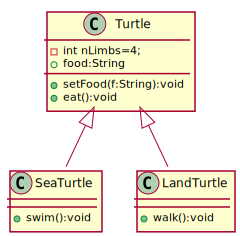

In [8]:
%%plantuml
@startuml
class Turtle {
    -int nLimbs=4;
    #food:String
    +setFood(f:String):void
    +eat():void
}
class SeaTurtle {
    +swim():void
}
class LandTurtle {
    +walk():void
}
Turtle <|-- SeaTurtle
Turtle <|-- LandTurtle
@enduml

위 설계에 따라 구현을 해보자.
함수는 단순하게 수영하거나, 걷는 동작의 출력문으로 대신하였다.

In [8]:
class Turtle {
    private int nLimbs=4;
    protected String food;
    public void setFood(String f) {
        this.food=f;
    }
    public void eat() {
        System.out.print("Turtle eats "+food);
    }   
}
class SeaTurtle extends Turtle {
    public void swim() {
        System.out.print("A sea turtle swims...");
    }
}
class LandTurtle extends Turtle {
    public void walk() {
        System.out.print("A land turtle walks...");
    }
}

 class Turtle {
     private int nLimbs=4;
     protected String food;
     public void setFood(String f) {
         this.food=f;
     }
     public void eat() {
         System.out.print("Turtle eats "+food);
     }   
 }
|  Replaced class Turtle
|    Update replaced class SeaTurtle
|    Update replaced class LandTurtle
|    Update replaced variable st, reset to null
|    Update overwrote class Turtle

 class SeaTurtle extends Turtle {
     public void swim() {
         System.out.print("A sea turtle swims...");
     }
 }
|  Modified class SeaTurtle
|    Update overwrote class SeaTurtle

 class LandTurtle extends Turtle {
     public void walk() {
         System.out.print("A land turtle walks...");
     }
 }
|  Modified class LandTurtle
|    Update overwrote class LandTurtle



**```nLimbs```**를 바다거북에서 읽어보자.
가시성 **private은 상속할 수 없다**.
"nLimbs has private access in Turtle" 즉 **nLimbs는 private으로 설정되어 있어 사용할 수 없다는 오류**가 발생하게 된다.


In [9]:
SeaTurtle st=new SeaTurtle();
System.out.println("바다거북의 다리 갯수: "+st.nLimbs);

 SeaTurtle st=new SeaTurtle();
|  Modified variable st of type SeaTurtle with initial value SeaTurtle@6e1ec318
|    Update overwrote variable st

 System.out.println("바다거북의 다리 갯수: "+st.nLimbs);
|  Error:
|  nLimbs has private access in Turtle
|  System.out.println("바다거북의 다리 갯수: "+st.nLimbs);
|                                     ^-------^



## 문제 oo-2: 상속을 사용하여 거북이를 구현한다. 

### 문제

객체지향이란 데이터를 꼭 필요한 경우에만 한정하여 허용하도록 구현할 수 있다.
거북이 사례에서 **```nLimbs```** 다리 갯수를 private으로 하면 자식클래스에서 사용할 수 없다.

### 해결

이 문제를 해결하려면, **```protected```**로 재설정하면 된다.

In [11]:
class Turtle {
    protected int nLimbs=4;
    protected String food;
    public int getNLimbs() {
        return this.nLimbs;
    }
    public void setFood(String f) {
        this.food=f;
    }
    public void eat() {
        System.out.print("Turtle eats "+food);
    }  
}
class SeaTurtle extends Turtle {
    public void swim() {
        System.out.print("A sea turtle swims...");
    }
}
class LandTurtle extends Turtle {
    public void walk() {
        System.out.print("A land turtle walks...");
    }
}

 class Turtle {
     protected int nLimbs=4;
     protected String food;
     public int getNLimbs() {
         return this.nLimbs;
     }
     public void setFood(String f) {
         this.food=f;
     }
     public void eat() {
         System.out.print("Turtle eats "+food);
     }  
 }
|  Added class Turtle

 class SeaTurtle extends Turtle {
     public void swim() {
         System.out.print("A sea turtle swims...");
     }
 }
|  Added class SeaTurtle

 class LandTurtle extends Turtle {
     public void walk() {
         System.out.print("A land turtle walks...");
     }
 }
|  Added class LandTurtle



In [12]:
SeaTurtle st=new SeaTurtle();
System.out.println("바다거북의 다리 갯수: "+st.getNLimbs());

 SeaTurtle st=new SeaTurtle();
|  Modified variable st of type SeaTurtle with initial value SeaTurtle@5ce81285
|    Update overwrote variable st

 System.out.println("바다거북의 다리 갯수: "+st.getNLimbs());
바다거북의 다리 갯수: 4



## 문제 oo-3: 원의 면적을 계산하기.

### 문제

모든 도형은 점을 가지고 있으므로 **```Point```** 클래스를 구현하고, **```Circle```** 클래스를 자식클래스로 구현한다고 하자. 이런 상속관계에서 원의 면적을 계산해 보자.

### 해결

* 속성 설정: **부모 Point 클래스**는 **위치(x,y)**를 가진다. 자식 Circle 클래스는 위치(x,y)를 사용한다. Circle은 **반지름**을 추가한다. 자식클래스에서 **사용하지 않는 속성은 private**으로 한다.

* 함수 설정: 자식클래스에 특화된 함수가 있는지 찾는다. Point 클래스는 면적을 계산하지 않지만, **Circle 클래스는 면적을 계산**한다.

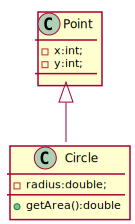

In [9]:
%%plantuml
@startuml
class Point {
    -x:int;
    -y:int;
    +Point()
    +Point(int xnew, int ynew)
    +getX():int
    +getY():int
    +toString():String
}
class Circle {
    -radius:double;
    +getArea():double
}

Point <|-- Circle
@enduml

In [13]:
class Point {
    protected int x;
    protected int y;
    public Point() {}
    public Point(int xnew, int ynew) {
        this.x=xnew;
        this.y=ynew;
    }
    public int getX() {
        return x;
    }
    public int getY() {
        return y;
    }
    @Override
    public String toString() {
        String msg="("+x+","+y+")";
        return msg;
    }
}

 class Point {
     protected int x;
     protected int y;
     public Point() {}
     public Point(int xnew, int ynew) {
         this.x=xnew;
         this.y=ynew;
     }
     public int getX() {
         return x;
     }
     public int getY() {
         return y;
     }
     @Override
     public String toString() {
         String msg="("+x+","+y+")";
         return msg;
     }
 }
|  Added class Point



In [14]:
class Circle extends Point {
    private double radius;
    public Circle(){}
    public Circle(int xnew, int ynew, double rnew) {
        super(xnew, ynew);
        this.radius=rnew;
    }
    public double getRadius() {
        return radius;
    }
    public double getCircumference() {
        return 2*Math.PI*getRadius();
    }
    public double getArea() {
        return Math.PI*getRadius()*getRadius();
    }
}

 class Circle extends Point {
     private double radius;
     public Circle(){}
     public Circle(int xnew, int ynew, double rnew) {
         super(xnew, ynew);
         this.radius=rnew;
     }
     public double getRadius() {
         return radius;
     }
     public double getCircumference() {
         return 2*Math.PI*getRadius();
     }
     public double getArea() {
         return Math.PI*getRadius()*getRadius();
     }
 }
|  Added class Circle



In [16]:
Circle myCircle=new Circle(10,10,5);
Double myArea=myCircle.getArea();
System.out.println("원 면적:"+myArea);

 Circle myCircle=new Circle(10,10,5);
|  Modified variable myCircle of type Circle with initial value (10,10)
|    Update overwrote variable myCircle

 Double myArea=myCircle.getArea();
|  Modified variable myArea of type Double with initial value 78.53981633974483
|    Update overwrote variable myArea

 System.out.println("원 면적:"+myArea);
원 면적:78.53981633974483



Double의 소수 출력이 길어서 마음에 들지 않는다면, 형식을 맞출 수 있다.
**```%.1f```**는 float로 소수 1자리를 출력한다. 

In [21]:
System.out.printf("%.2f",myArea);

 System.out.printf("%.2f",myArea);
78.54|  Expression value is: java.io.PrintStream@3b0143d3
|    assigned to temporary variable $35 of type PrintStream



또는 **```NumberFormat```**을 사용하여 형식을 맞출 수 있다.
소수점 2자리로 형식을 설정한다. **```new DecimalFormat("#0.00")```**

In [20]:
import java.text.NumberFormat;
import java.text.DecimalFormat;
NumberFormat formatter = new DecimalFormat("#0.00");
System.out.println("원 면적:"+formatter.format(myArea));

 import java.text.NumberFormat;

 import java.text.DecimalFormat;

 NumberFormat formatter = new DecimalFormat("#0.00");
|  Added variable formatter of type NumberFormat with initial value java.text.DecimalFormat@674dc

 System.out.println("원 면적:"+formatter.format(myArea));
원 면적:78.54



## 7.4 Interface

### 7.4.1 interface란 

자바의 인터페이스는 **함수의 선언**만을 정의하고, **구현은 비워 놓도록** **```abstract method```**로 만들어졌다.
이와 같이 함수의 선언만 **인터페이스로 분리하는 이유**는 무엇일까?
**함수선언은 지켜서 구현하라는 약속**이다.
함수를 구현할 때 함수명, 입력, 출력을 정하고 이를 지켜서 구현하도록 하면
구현하는 코드는 변경될 수 있어도 함수의 선언은 바뀌지 않게 된다.
즉 인터페이스에서 정한 함수의 선언을 지켜서 자식클래스에서 자신의 필요에 따라 구현하게 된다.
선언을 지키면 함수의 선언은 고정할 수 있어, 이를 **사용하는 측의 코드 변경이 최소화될 수 있다**.

따라서 인터페이스는 (abstract method로서 구현이 비워져 있기 때문에)**객체를 생성할 수 없고, Object에서 로부터 물려 받는 보통 클래스와 같은 특징을 가지지 않는다**.

### 7.4.2 다중상속

자바는 다중상속을 할 수 없다. 즉 클래스를 다중상속 할 수 없다. **다중상속을 하려면 인터페이스를 활용**하여 구현한다.
클래스A는 클래스B를 확장한다. 추가적인 확장은 할 수 없다. 인터페이스 C,D를 사용하여 다중구현을 해서 보완한다.

In [ ]:
import iplantuml

In [ ]:
%%plantuml
@startuml
class A
class B
interface C
interface D
B <|-- A 
C <|.. A
D <|.. A
@enduml

In [1]:
interface C {}
class B {}
class A extends B implements C {}

 interface C {}
|  Added interface C

 class B {}
|  Added class B

 class A extends B implements C {}
|  Added class A



인터페이스는 다른 인터페이스를 상속할 수 있다.
```interface D```는 ```inteface C```를 상속한다.

In [2]:
interface C {}
interface D extends C {}

 interface C {}
|  Modified interface C
|    Update overwrote interface C

 interface D extends C {}
|  Added interface D



위와 같이 인터페이스 간에 상속을 하기 보다는 아래와 같이 **두 인터페이스 C, D를 같이 구현**할 수 있다.
이와 같이 하면 2개의 인터페이스를 동시에 같이 구현하는 효과를 얻을 수 있다.
아래 예제에서 ```Cloneable```, ```Comparable```을 동시에 구현하는 볼 수 있다.

In [1]:
interface C {}
class B {}
class A extends B implements C {}

 interface C {}
|  Added interface C

 class B {}
|  Added class B

 class A extends B implements C {}
|  Added class A



### 7.4.3 인터페이스 구현 예제

Rectangle클래스는 Shape 인터페이스를 구현한다.

```java
class Rectangle implements Shape
```

In [ ]:
%%plantuml
@startuml
interface IShape {
    +calcArea():double
    +calcPerimeter():double
}
class Rectangle {
    -final width:double
    -final height:double
    -final area:double
    -final perimeter:double
}
Rectangle .right.|> Shape
@enduml

In [ ]:
# %load src/IShape.java
interface IShape {
    public double calcArea();
    public double calcPerimeter();
}


In [ ]:
# %load src/Rectangle.java
class Rectangle implements IShape {
  private final double width, height;
  public Rectangle(double width, double height) {
    this.width = width;
    this.height= height;
  }
  @Override
  public double calcArea() {
    return width * height;
  }

  @Override
  public double calcPerimeter() {
    return 2 * (width + height);
  }
}


인터페이스 및 자바 파일은 하나씩 파일명과 동일하게 저장하여 컴파일한다.
RectangleMain에서 인터페이스 IShape, 클래스 Rectangle을 사용하게 된다.

컴파일 및 실행 | 명령어
-----|-----
interface 컴파일 | javac -d classes/ -sourcepath src/ src/IShape.java 
Rectangle 컴파일 | javac -d classes/ -sourcepath src/ src/Rectangle.java 
RectangleMain 컴파일 | javac -d classes/ -sourcepath src/ src/RectangleMain.java 
RectangleMain 실행 | java -cp classes/ RectangleMain


In [ ]:
# %load src/RectangleMain.java
class RectangleMain {
    public static void main(String[] args) {
        Rectangle r=new Rectangle(10.,20.);
        System.out.println(r.calcArea());
    }
}


물론 jshell에서도 불러 사용할 수 있다.

In [11]:
Rectangle r=new Rectangle(10.,20.);
System.out.println(r.calcArea());

 Rectangle r=new Rectangle(10.,20.);
|  Added variable r of type Rectangle with initial value Rectangle@57fffcd7

 System.out.println(r.calcArea());
200.0



### 7.4.4 default methods

자바 버전 8에 **```Default 함수```**, **```Static 함수```**가 추가되었고
9에 **```Private 함수```**, **```private static 함수```**가 새로이 추가 되었다.


버전 | 인터페이스에 추가하는 함수
-----|-----
8 | default, static
9 | private, private static

예를 들어, 아래와 같이 **인터페이스에 ```print()``` 함수를 추가**해보자.
이런 경우, 그 인터페이스를 구현한 Rectangle 클래스는 print() 함수를, 버전 1.8이전에는, 반드시 구현했어야 했다. 
**default로 선언해 놓으면 이를 구현하지 않아도** 된다.
즉 이미 그 인터페이스 함수를 구현한 클래스가 있다 하더라도, 수정하지 않아도 된다는 말이다.
즉 후방으로 호환성 **backward compatibility**가 보장된다.
단 default로 선언하면 그 함수의 body는 구현해 놓아야 한다.

In [13]:
interface IShape {
    public double calcArea();
    public double calcPerimeter();
    default void print() {
        System.out.println("Hello default");
    }
}

 interface IShape {
     public double calcArea();
     public double calcPerimeter();
     default void print() {
         System.out.println("Hello default");
     }
 }
|  Added interface IShape
|    Update replaced class Rectangle
|    Update replaced variable r, reset to null



In [16]:
Rectangle r=new Rectangle(10.,20.);
System.out.println(r.calcArea());
r.print();


 Rectangle r=new Rectangle(10.,20.);
|  Modified variable r of type Rectangle with initial value Rectangle@72d818d1
|    Update overwrote variable r

 System.out.println(r.calcArea());
200.0

 r.print();
Hello default



### 7.4.5 Clone 예제

객체는 **참조**를 통해 실제 값을 가리키고 있다.
따라서 앞서 설명한 바와 같이 복사할 경우 문제가 발생할 수 있다.

즉 참조만을 복사하기 때문에 **실제 값이 원래대로 유지되지 않을 위험**이 있다.
자바는 reference를 통한 참조. 복사는 C와 달리 clone()함수를 사용.

앞서 복사한 것

구분 | 설명
-----|-----
shallow copying | primitive data만 복사.
deep copying | primitive data + object ref까지 복사.


In [32]:
class Dog {
    String name;
    String breed;
    public Dog(String name, String breed) {
        this.name = name;
        this.breed = breed;
    }
}

 class Dog {
     String name;
     String breed;
     public Dog(String name, String breed) {
         this.name = name;
         this.breed = breed;
     }
 }
|  Added class Dog



Object 클래스는 clone() 함수를 가지고 있다.
이 함수를 사용하여 객체를 복사할 수 있다.
```java
protected Object clone()
```

그러나 **clone() 함수를 직접 호출하면 예외**가 발생한다.
**클래스 Object에서 상속받는 함수이지만** 반드시 자바는 **Cloneable 인터페이스를 구현**해서 객체를 복사한다.

In [33]:
Dog d=new Dog("js","robot");
d.clone();

 Dog d=new Dog("js","robot");
|  Added variable d of type Dog with initial value Dog@3159c4b8

 d.clone();
|  Error:
|  clone() has protected access in java.lang.Object
|  d.clone();
|  ^-----^



In [34]:
class Dog implements Cloneable {
    String name;
    String breed;
    public Dog(String name, String breed) {
        this.name = name;
        this.breed = breed;
    }
    @Override
    protected Object clone() throws CloneNotSupportedException {
        return super.clone();
    }
}

 class Dog implements Cloneable {
     String name;
     String breed;
     public Dog(String name, String breed) {
         this.name = name;
         this.breed = breed;
     }
     @Override
     protected Object clone() throws CloneNotSupportedException {
         return super.clone();
     }
 }
|  Replaced class Dog
|    Update replaced variable d, reset to null
|    Update overwrote class Dog



In [35]:
Dog myDog=new Dog("Salgu","mixed");

 Dog myDog=new Dog("Salgu","mixed");
|  Added variable myDog of type Dog with initial value Dog@5025a98f



```clone()```은 클래스 Object를 return한다. 따라서 사용하는 측이 맞게 형변환을 해야 한다.
따라서 myDog이 **원하는 클래스 Dog으로 형변환 cast**를 한다.
이경우 Cloneable이 아니면 ```CloneNotSupportedException``` 발생한다.

In [36]:
Dog copiedDog=myDog.clone();

 Dog copiedDog=myDog.clone();
|  Error:
|  incompatible types: java.lang.Object cannot be converted to Dog
|  Dog copiedDog=myDog.clone();
|                ^-----------^



In [37]:
Dog copiedDog=(Dog)myDog.clone();

 Dog copiedDog=(Dog)myDog.clone();
|  Added variable copiedDog of type Dog with initial value Dog@20322d26



발생할 수 있는 예외는 try-catch문으로 ```CloneNotSupportedException```을 처리할 수 있다.

In [38]:
try {
    copiedDog=(Dog)myDog.clone();
} catch (CloneNotSupportedException e) {
    e.printStackTrace();
    System.out.println("Hello");
}

 try {
     copiedDog=(Dog)myDog.clone();
 } catch (CloneNotSupportedException e) {
     e.printStackTrace();
     System.out.println("Hello");
 }



복사본과 원본은 서로 다르다.

In [39]:
copiedDog.hashCode();

 copiedDog.hashCode();
|  Expression value is: 1690254271
|    assigned to temporary variable $15 of type int



In [40]:
myDog.hashCode();

 myDog.hashCode();
|  Expression value is: 1344645519
|    assigned to temporary variable $16 of type int



### 7.4.6   Comparable 예제

객체를 서로 비교할 경우, 문제가 간단하지 않다.
**자동차를 비교**한다고 하자.
자동차의 **속도**가 빠르다, 느리다라고 할 수 있다.
또한 자동차의 **가격**을 기준으로 비교하면 높다, 낮다라고 할 수 있다.
이와 같이 객체를 서로 비교한다는 것은 **기준을 정해야** 한다.

객체는 compareTo() 함수를 사용해서 비교한다.
인터페이스 **```Comparable```**은 **```compareTo()```** 함수를 가지고 있고 이를 구현해서 비교한다.

**```int compareTo(T o)```**


#### 정렬할 경우 ```compareTo()``` 미구현하면 예외가 발생

위에서 선언했던 Dog 클래스를 비교하면 앞서 설명했던 예외가 발생한다.
즉 Dog을 비교한다면 그 **기준이 무엇인지 불분명**하므로 **예외**의 원인이 된다.

In [42]:
class Dog {
    String name;
    String breed;
    public Dog(String name, String breed) {
        this.name = name;
        this.breed = breed;
    }
}

 class Dog {
     String name;
     String breed;
     public Dog(String name, String breed) {
         this.name = name;
         this.breed = breed;
     }
 }
|  Modified class Dog
|    Update overwrote class Dog



In [43]:
Dog[] dogs=new Dog[3];
dogs[0]=new Dog("d1","Poodle");
dogs[1]=new Dog("d2","Husky");
dogs[2]=new Dog("d3","Shih Tzu");

 Dog[] dogs=new Dog[3];
|  Added variable dogs of type Dog[] with initial value [LDog;@60c6f5b

 dogs[0]=new Dog("d1","Poodle");
|  Expression value is: Dog@3c0f93f1
|    assigned to temporary variable $20 of type Dog

 dogs[1]=new Dog("d2","Husky");
|  Expression value is: Dog@544fe44c
|    assigned to temporary variable $21 of type Dog

 dogs[2]=new Dog("d3","Shih Tzu");
|  Expression value is: Dog@71318ec4
|    assigned to temporary variable $22 of type Dog



d1, d2, d3는 Dog의 객체이다. 정렬을 해보면 예외가 발생한다.
객체를 서로 비교할 수 없는 경우 **```ClassCastException```** 예외가 발생한다.
객체를 비교할 경우, compareTo()를 호출한다.
이 compareTo() 함수는 인터페이스 Comparable에서 구현하지만, 미구현되었을 겨우 예외가 발생한다.

In [44]:
Arrays.sort(dogs);

 Arrays.sort(dogs);
|  java.lang.ClassCastException thrown: REPL.$REPL17E$Dog (in module: Unnamed Module) cannot be cast to java.lang.Comparable (in module: java.base)
|        at ComparableTimSort.countRunAndMakeAscending (ComparableTimSort.java:320)
|        at ComparableTimSort.sort (ComparableTimSort.java:188)
|        at Arrays.sort (Arrays.java:1248)
|        at (#29:1)



#### ```compareTo()```를 구현해서 정렬

Dog은 어떤 기준으로 정렬을 해야 옳을까?
그 기준은 Dog이 가진 속성이 후보가 된다.
이름 'name' 또는 종 'breed'을 기준으로 삼을 수 있다.

줄 | 설명
-----|-----
1 | 인터페이스 ```Comparable```을 구현
8 ~ 12 | ```Comparable```의 ```compareTo()```를 재정의
11 | Dog의 name으로 비교. String객체는 **```compareTo()```**를 사용하여 비교
13 ~ 17 | 클래스 ```Object```의 ```toString()```을 재정의.

In [45]:
class DogV1 implements Comparable {
    String name;
    String breed;
    public DogV1(String name, String breed) {
        this.name = name;
        this.breed = breed;
    }
    @Override
    public int compareTo(Object o) {
        DogV1 d=(DogV1)o;
        return this.name.compareTo(d.name);
    }
    @Override
    public String toString() {
        String msg=name+" "+breed;
        return msg;
    }
}

 class DogV1 implements Comparable {
     String name;
     String breed;
     public DogV1(String name, String breed) {
         this.name = name;
         this.breed = breed;
     }
     @Override
     public int compareTo(Object o) {
         DogV1 d=(DogV1)o;
         return this.name.compareTo(d.name);
     }
     @Override
     public String toString() {
         String msg=name+" "+breed;
         return msg;
     }
 }
|  Added class DogV1



In [46]:
DogV1[] myDogs=new DogV1[3];
myDogs[0]=new DogV1("d1","Poodle");
myDogs[1]=new DogV1("d2","Husky");
myDogs[2]=new DogV1("d3","Shih Tzu");

 DogV1[] myDogs=new DogV1[3];
|  Added variable myDogs of type DogV1[] with initial value [LDogV1;@5ec0a365

 myDogs[0]=new DogV1("d1","Poodle");
|  Expression value is: d1 Poodle
|    assigned to temporary variable $26 of type DogV1

 myDogs[1]=new DogV1("d2","Husky");
|  Expression value is: d2 Husky
|    assigned to temporary variable $27 of type DogV1

 myDogs[2]=new DogV1("d3","Shih Tzu");
|  Expression value is: d3 Shih Tzu
|    assigned to temporary variable $28 of type DogV1



앞서 ```Comparable```의 ```compareTo()```를 재정의 하였다.
**```Arrays.sort()```는 자동으로 ```compareTo()```를 호출**하여 정렬한다.

In [47]:
Arrays.sort(myDogs);

 Arrays.sort(myDogs);



앞서 정의한 바와 같이 ```toString()``` 함수를 반복문으로 출력한다.

In [48]:
for(DogV1 d:myDogs)
    System.out.println(d.toString());

 for(DogV1 d:myDogs)
     System.out.println(d.toString());
d1 Poodle
d2 Husky
d3 Shih Tzu



클래스로 완성해보자.
앞서 DogV1은 그대로 사용한다.
main()함수는 별도로 구현한다.

In [ ]:
class DogV1 implements Comparable {
    String name;
    String breed;
    public DogV1(String name, String breed) {
        this.name = name;
        this.breed = breed;
    }
    @Override
    public int compareTo(Object o) {
        DogV1 d=(DogV1)o;
        return this.name.compareTo(d.name);
    }
    @Override
    public String toString() {
        String msg=name+" "+breed;
        return msg;
    }
}

In [ ]:
import java.util.Arrays;

public class DogV1SorterMainV1 {
    public static void main(String[] args){
        DogV1[] myDogs=new DogV1[3];
        myDogs[0]=new DogV1("d1","Poodle");
        myDogs[1]=new DogV1("d2","Husky");
        myDogs[2]=new DogV1("d3","Shih Tzu");
        Arrays.sort(dogs);
        for(DogV1 d:myDogs)
            System.out.println(d.toString());
    }
}

## 문제 Dog class를 deep clone한다.

### 문제

앞서 객체의 복사는 문제가 될 수 있다고 했다.
원시타잎과 달리 객체는 참조만을 복사해서 사용하기 때문에 원본이 변경될 위험이 항상 있다.
그런 위험을 제거하기 위한 복사를 구현하자.

### 해결
원본이 변경되어도 그런 위험이 없도록 하려면 deep copy를 해야 한다.
Dog 클래스 속성 가운데 객체를 복사해서 넘겨준다.


shallow copy는 단순히 부모클래스 Object의 super.clone() 함수를 호출한다.

```java
@Override
protected Object clone() throws CloneNotSupportedException {
    return super.clone();
}
```

그러나 deep copy는 아래와 같다. 즉 Date 객체인 birthDay까지 clone()을 만들어야 한다.

In [49]:
class DogV2 implements Comparable, Cloneable {
    String name=null;
    String breed=null;
    private java.util.Date birthDay;
    public DogV2(String name, String breed) {
        this.name = name;
        this.breed = breed;
        this.birthDay = new Date();  //현재시점
    }
    @Override
    protected Object clone() throws CloneNotSupportedException {
        try {
            DogV2 dogClone = (DogV2)super.clone();
            //Deep copy on birthDay
            dogClone.birthDay = (java.util.Date)(birthDay.clone());
            return dogClone;
        } catch (CloneNotSupportedException e) {
            e.printStackTrace();
            return null;
        }
    }
    @Override
    public int compareTo(Object o) {
        DogV2 d=(DogV2)o;
        return this.name.compareTo(d.name);
    }
    @Override
    public String toString() {
        String msg=name+":"+breed+":"+birthDay.toString();
        return msg;
    }
}

 class DogV2 implements Comparable, Cloneable {
     String name=null;
     String breed=null;
     private java.util.Date birthDay;
     public DogV2(String name, String breed) {
         this.name = name;
         this.breed = breed;
         this.birthDay = new Date();  //현재시점
     }
     @Override
     protected Object clone() throws CloneNotSupportedException {
         try {
             DogV2 dogClone = (DogV2)super.clone();
             //Deep copy on birthDay
             dogClone.birthDay = (java.util.Date)(birthDay.clone());
             return dogClone;
         } catch (CloneNotSupportedException e) {
             e.printStackTrace();
             return null;
         }
     }
     @Override
     public int compareTo(Object o) {
         DogV2 d=(DogV2)o;
         return this.name.compareTo(d.name);
     }
     @Override
     public String toString() {
         String msg=name+":"+breed+":"+birthDay.toString();
         return msg;
     }
 }
|  Added class DogV2



In [50]:
DogV2 dogv2=new DogV2("js","Poodle");
DogV2 copiedDogV2=(DogV2)dogv2.clone();

 DogV2 dogv2=new DogV2("js","Poodle");
|  Added variable dogv2 of type DogV2 with initial value js:Poodle:Sat Jun 02 16:24:32 KST 2018

 DogV2 copiedDogV2=(DogV2)dogv2.clone();
|  Added variable copiedDogV2 of type DogV2 with initial value js:Poodle:Sat Jun 02 16:24:32 KST 2018



In [51]:
System.out.println("Dog객체: "+copiedDogV2.toString());

 System.out.println("Dog객체: "+copiedDogV2.toString());
Dog객체: js:Poodle:Sat Jun 02 16:24:32 KST 2018



## 7.5 abstract class

abstract class는 **하나 이상의 함수**를 선언만 하고 비워서 **구현하지 않는 abstract method**를 가진다.
따라서 abstract class에서 객체를 생성할 수 없다.
abstract class를 상속하고 자식클래스에서 실제 구현을 채우게 된다.
이를 **overriding**이라고 한다.

* abstract으로 선언하고, 자식클래스에서 재정의할 수 있다.
* abstract으로 선언하지 않으면, 자식클래스에서 선택적으로 재정의할 수 있다.

### 7.5.1 인터페이스와 비교

추상클래스는 '인터페이스'와 자주 비교된다.
요약하면, 추상클래스에서 **속성을 제외하고, 모든 함수를 추상으로 정의하는 경우에는 인터페이스와 동일**하다
그렇지 않은 경우에는 서로 다르다.

구분 | 인터페이스 | 추상클래스
-------|-------|-------
속성을 가질 수 있다 |  없다 | 있다
함수를 가질 수 있다 | 있다 | 있다
함수를 구현할 수 있다 | 없다 (default method가 아닌 경우) | 있다
객체를 생성할 수 있다 | 없다 | 없다 (추상클래스인 경우)

어느 경우, 추상클래스 또는 인터페이스를 사용하는가?
* **인터페이스**는 **함수 API를 정의**하는 목적으로 사용한다. 어떤 입력을 사용해서, 어떤 결과를 반환해야 하는지를 결정하고 구현하도록 강제한다는 점에서 '**marker**'라고 한다.
* 반면, **추상클래스**는 함수의 구현을 상속할 수 있다. 자식클래스에서 재정의하지 않으면, 부모의 것을 default로 사용한다.

**Shape**의 사례를 추상클래스를 사용하여 구현한다.

선언부에 클래스를 abstract으로 정의한다.

```java
abstract class Shape
```

## 문제 oo-4: 클래스 상속을 사용하여 도형의 면적을 구하기

### 문제

앞서 추상클래스와 인터페이스를 비교하여 설명하였다.
인터페이스로 구현한 IShape을 추상클래스로 변경하여 구현해 보자.

### 해결

calArea(), calcPerimeter() 함수를 **abstract**으로 선언한다.
비교를 쉽게 하기 위해 인터페이스 IShape과 동일하게 유지하여 구현한다.

In [ ]:
%%plantuml
@startuml
abstract class Shape {
    +abstract calcArea():double
    +abstract calcPerimeter():double
}
class Rectangle {
    -final width:double
    -final height:double
    -final area:double
    -final perimeter:double
}
Rectangle -right-|> Shape
@enduml

In [37]:
public abstract class Shape {
    public String name="Shape";
    public abstract double calcArea();
    public abstract double calcPerimeter();
    public String getName() { return this.name; }
    public String toString() {
        return "Shape..."+super.toString();
    }
}

 public abstract class Shape {
     public String name="Shape";
     public abstract double calcArea();
     public abstract double calcPerimeter();
     public String getName() { return this.name; }
     public String toString() {
         return "Shape..."+super.toString();
     }
 }
|  Warning:
|  Modifier 'public'  not permitted in top-level declarations, ignored
|  public abstract class Shape {
|  ^-------------^
|  Added class Shape this error is corrected: 
|      Modifier 'public'  not permitted in top-level declarations, ignored
|      public abstract class Shape {
|      ^-------------^



위에 구현한 Rectangle을 다시 Shape을 확장하여 만들어 보자.

In [39]:
public class Rectangle extends Shape {
    private final double width, height, area, perimeter;
    public Rectangle(double width, double height) {
        this.width = width;
        this.height= height;
        this.area = width * height;
        this.perimeter = 2 * (width + height);
    }
    @Override
    public double calcArea() {
        return this.area;
    }
    @Override
    public double calcPerimeter() {
        return this.perimeter;
    }
    public String toString() {
        return "Rectangle..."+super.toString();
    }
}

 public class Rectangle extends Shape {
     private final double width, height, area, perimeter;
     public Rectangle(double width, double height) {
         this.width = width;
         this.height= height;
         this.area = width * height;
         this.perimeter = 2 * (width + height);
     }
     @Override
     public double calcArea() {
         return this.area;
     }
     @Override
     public double calcPerimeter() {
         return this.perimeter;
     }
     public String toString() {
         return "Rectangle..."+super.toString();
     }
 }
|  Warning:
|  Modifier 'public'  not permitted in top-level declarations, ignored
|  public class Rectangle extends Shape {
|  ^----^
|  Replaced class Rectangle this error is corrected: 
|      Modifier 'public'  not permitted in top-level declarations, ignored
|      public class Rectangle extends Shape {
|      ^----^
|    Update replaced variable r, reset to null
|    Update overwrote class Rectangle



In [40]:
public class Circle extends Shape {
    private final double radius, area, perimeter;

    public Circle(double radius) {
        this.radius = radius;
        this.area = Math.PI * radius * radius;
        this.perimeter = 2 * Math.PI * radius;
    }
    @Override
    public double calcArea() {
        return this.area;
    }
    @Override
    public double calcPerimeter() {
        return this.perimeter;
    }
    public String toString() {
        return "Circle..."+super.toString();
    }
}

 public class Circle extends Shape {
     private final double radius, area, perimeter;
 
     public Circle(double radius) {
         this.radius = radius;
         this.area = Math.PI * radius * radius;
         this.perimeter = 2 * Math.PI * radius;
     }
     @Override
     public double calcArea() {
         return this.area;
     }
     @Override
     public double calcPerimeter() {
         return this.perimeter;
     }
     public String toString() {
         return "Circle..."+super.toString();
     }
 }
|  Warning:
|  Modifier 'public'  not permitted in top-level declarations, ignored
|  public class Circle extends Shape {
|  ^----^
|  Added class Circle this error is corrected: 
|      Modifier 'public'  not permitted in top-level declarations, ignored
|      public class Circle extends Shape {
|      ^----^



In [17]:
Rectangle r=new Rectangle(3,4);
Circle c=new Circle(5);

 Rectangle r=new Rectangle(3,4);
|  Added variable r of type Rectangle with initial value Rectangle...Shape ...Rectangle@4bec1f0c

 Circle c=new Circle(5);
|  Added variable c of type Circle with initial value Circle...Shape ...Circle@2d928643



In [18]:
r.calcArea();
c.calcArea();

 r.calcArea();
|  Expression value is: 12.0
|    assigned to temporary variable $18 of type double

 c.calcArea();
|  Expression value is: 78.53981633974483
|    assigned to temporary variable $19 of type double



### 7.5.2 다중상속

```java
public class Circle extends Shape implements Cloneable
```

## 7.6 Polymorphism

### 7.6.1 다형성이란?
다형성은 변수나 객체 등에 **여러 타잎이 할당될 수 있다**는 것을 말한다.
예를 들어 ```int x```라고 선언하면 x에는 정수타잎만 허용된다. 이런 경우는 다형적이 아니라 **단형적**이다.
반면에 ```Object x```라고 선언하면 x에는 어느 타잎이나 허용된다.
String, Integer 등 어떤 참조 타잎이든 할당할 수 있다. 이런 특징을 **다형적**이라고 한다.
이러한 특징을 잘 활용하면 **객체지향스러운 프로그래밍**을 할 수 있게 된다.


### 7.6.2 동적바인딩

다형성을 사용하려면:
* 객체들이 **상속관계**에 있어야 한다. 이러한 상속계층에서 suptype, supertype의 전환 casting을 할 수 있게 된다.
* 또한 **overriding 함수**가 있어야 한다. subtype 고유의 함수는 upcasting하면서 사라짐 (losing access to subtype features)

즉 객제지향의 다형성은:
* 부모클래스의 참조가 자식클래스를 가리키고 있을 때, 자식클래스의 함수가 호출될 수 있다.
* 런타임에 자식클래스의 호출할 함수가 결정된다.

이를 동적바인딩이라고 한다. C++에서는 RTTI (Run Time Type Identification)라고 한다. 반면에 정적바인딩은 한 번 타잎이 할당되면 변경할 수 없는 경우를 말한다.
* 동적바인딩은 '**런타임 시점**'에 객체에 **할당된 참조에 따라** 사용할 함수를 '**동적**'으로 결정한다.
* 정적바인딩은 '**컴파일 시점**'에 **클래스 타잎에 따라** '**정적**'으로 결정한다.

구분 | dynamic binding | static binding
-------|-------|-------
발생시점 | 런타임 | 컴파일타임
적용 | 재정의 함수 | 재정의되지 않은 경우. private, final, static
사용정보 | 객체 | 클래스

### 7.6.3 거북이 다형성 예제

다형성을 사용하기 위해 부모클래스에 자식클래스의 객체를 할당한다.
* 자식클래스 SeaTurtle의 객체가 부모클래스 Turtle에 할당
* upcasting을 하면, 부모클래스가 자식클래스의 참조를 가진다.
* 재정의한 함수를 다형적으로 호출 할 수 있다.

In [12]:
Turtle t=new SeaTurtle();

 Turtle t=new SeaTurtle();
|  Added variable t of type Turtle with initial value SeaTurtle@4566e5bd



* 이런 경우, 자식클래스 SeaTurtle 고유의 함수 swim()은 사라짐

In [13]:
t.swim();

 t.swim();
|  Error:
|  cannot find symbol
|    symbol:   method swim()
|  t.swim();
|  ^----^



* upcasting한 후, 다시 downcasting할 수 있다.
    * upcasting한 객체에서 downcasting해야 한다.
    * downcast는 '명시적'으로 해야 한다 (upcast는 자동으로 이루어진다).

In [14]:
SeaTurtle stFromTurtle = (SeaTurtle)t;

 SeaTurtle stFromTurtle = (SeaTurtle)t;
|  Added variable stFromTurtle of type SeaTurtle with initial value SeaTurtle@4566e5bd



In [15]:
stFromTurtle.swim();

 stFromTurtle.swim();
A sea turtle swims...


* supertype의 함수를 실행할 수 있다. 이 함수를 overriding하는 경우 subtype의 eat()이 실행된다.
List에 넣어 다형적으로 함수를 실행한다.
//st.eat();
//lt.eat();

In [16]:
ArrayList<Turtle> turtle=new ArrayList<>();

SeaTurtle st=new SeaTurtle();
LandTurtle lt=new LandTurtle();
st.setFood("seaweeds");
lt.setFood("plants");

turtle.add(t);
turtle.add(st);
turtle.add(lt);
for(Turtle my:turtle)
    my.eat();

 ArrayList<Turtle> turtle=new ArrayList<>();
|  Added variable turtle of type ArrayList<Turtle> with initial value []

 

 SeaTurtle st=new SeaTurtle();
|  Added variable st of type SeaTurtle with initial value SeaTurtle@69ea3742

 LandTurtle lt=new LandTurtle();
|  Added variable lt of type LandTurtle with initial value LandTurtle@3159c4b8

 st.setFood("seaweeds");

 lt.setFood("plants");

 

 turtle.add(t);
|  Expression value is: true
|    assigned to temporary variable $25 of type boolean

 turtle.add(st);
|  Expression value is: true
|    assigned to temporary variable $26 of type boolean

 turtle.add(lt);
|  Expression value is: true
|    assigned to temporary variable $27 of type boolean

 for(Turtle my:turtle)
     my.eat();
Turtle eats nullTurtle eats seaweedsTurtle eats plants
 //st.eat();

 //lt.eat();



In [5]:
t.eat();

 t.eat();
Turtle eats null


In [6]:
class SeaTurtle extends Turtle {
    public void swim() {
        System.out.print("A sea turtle swims...");
    }
    public void eat(){
        System.out.print("A sea turtle eats "+food);
    }
}

 class SeaTurtle extends Turtle {
     public void swim() {
         System.out.print("A sea turtle swims...");
     }
     public void eat(){
         System.out.print("A sea turtle eats "+food);
     }
 }
|  Replaced class SeaTurtle
|    Update overwrote class SeaTurtle



* setFood()는 supertype의 함수
* supertype의 setFood()를 실행해서 먹이를 설정한다.
    ```
    t.setFood("seaweeds");
    ```

* t.eat()은 다형성이 실행된다.
    * supertyep의 eat()이 실행될지, suptype의 eat()이 실행될지 모른다.
    * late binding이란 실행시점에 subtype seaturtle의 eat()이 실행된다.
    ```
    t.eat();
    ```

In [7]:
t.setFood("seaweeds");
t.eat();

 t.setFood("seaweeds");

 t.eat();
Turtle eats seaweeds


## 문제  oo-5: 여러나라 언어로 sayHello 하기

### 문제

여러나라 말로 **```sayHello()```**를 호출하는 문제이다.

### 해결

배열은 원시 타잎, 객체 타잎 모두 저장할 수 있다.
**배열**에 객체를 저장하여, 다형적으로 호출하여 보자.
즉 객체배열을 사용하여, 다국적 언어로 출력하는 sayHello() 함수를 반복문에서 일괄 호출한다.

### Hello 클래스

sayHello() 함수를 **추상화**하고, 실제 사용하는 언어에서 구현하기로 하자.

In [23]:
abstract class Hello {
    protected String name;
    public Hello(String name) {
        this.name=name;
    }
    abstract public void sayHello();
}

 abstract class Hello {
     protected String name;
     public Hello(String name) {
         this.name=name;
     }
     abstract public void sayHello();
 }
|  Replaced class Hello
|    Update overwrote class Hello



In [25]:
class HelloChinese extends Hello {
    public HelloChinese(String name) {
        super(name);
    }
    @Override
    public void sayHello() {
        System.out.println("你好 "+ name);
    }
}

 class HelloChinese extends Hello {
     public HelloChinese(String name) {
         super(name);
     }
     @Override
     public void sayHello() {
         System.out.println("你好 "+ name);
     }
 }
|  Added class HelloChinese



In [26]:
class HelloJapanese extends Hello {
    public HelloJapanese(String name) {
        super(name);
    }
    @Override
    public void sayHello() {
        System.out.println("こんにちは "+ name);
    }
}

 class HelloJapanese extends Hello {
     public HelloJapanese(String name) {
         super(name);
     }
     @Override
     public void sayHello() {
         System.out.println("こんにちは "+ name);
     }
 }
|  Added class HelloJapanese



In [30]:
class HelloKorean extends Hello {
    public HelloKorean(String name) {
        super(name);
    }
    @Override
    public void sayHello() {
        System.out.println("안녕하세요 "+ name);
    }
}

 class HelloKorean extends Hello {
     public HelloKorean(String name) {
         super(name);
     }
     @Override
     public void sayHello() {
         System.out.println("안녕하세요 "+ name);
     }
 }
|  Added class HelloKorean



### 다형적 호출

객체의 배열을 선언한다. 배열은 저장 갯수를 미리 정해야 한다. 갯수를 임의로 늘릴 수 없다.

In [31]:
Hello[] h=new Hello[3];

h[0]=new HelloChinese("js1");
h[1]=new HelloJapanese("js2");
h[2]=new HelloKorean("js3");

 Hello[] h=new Hello[3];
|  Modified variable h of type Hello[] with initial value [LHello;@4e1d422d
|    Update overwrote variable h

 

 h[0]=new HelloChinese("js1");
|  Expression value is: HelloChinese@52a86356
|    assigned to temporary variable $27 of type Hello

 h[1]=new HelloJapanese("js2");
|  Expression value is: HelloJapanese@78c03f1f
|    assigned to temporary variable $28 of type Hello

 h[2]=new HelloKorean("js3");
|  Expression value is: HelloKorean@4fe3c938
|    assigned to temporary variable $29 of type Hello



* h를 출력하면 toString을 호출하게 됨. 객체의 hash code를 출력한다.
* 저장된 객체가 없는 경우에는 null을 출력한다.

In [36]:
for(int i=0;i<3;i++)
    System.out.println(h[i]);

 for(int i=0;i<3;i++)
     System.out.println(h[i]);
REPL.$REPL22$HelloChinese@52a86356
REPL.$REPL21$HelloJapanese@78c03f1f
REPL.$REPL28$HelloKorean@4fe3c938



* 다형적으로 함수를 호출한다.

In [34]:
for(int i=0;i<h.length;i++)
    h[i].sayHello();

 for(int i=0;i<h.length;i++)
     h[i].sayHello();
你好 js1
こんにちは js2
안녕하세요 js3



* 객체를 출력하는 반복문이다.

In [35]:
for(Hello e:h)
    e.sayHello();

 for(Hello e:h)
     e.sayHello();
你好 js1
こんにちは js2
안녕하세요 js3



## 문제 oo-6:  도형을 다형적으로 면적 계산하기

### 문제

도형은 삼각형, 사각형 등에 따라 면적을 계산식이 다르다.
객체지향 방식으로 프로그래밍하여 아닌 방식과 비교해 보자.

### 해결

* 버전 1: instanceof
* 버전 2: 다형성

* 부모클래스 Shape[]에 자식클래스를 저장하고 (예: Circle, Rectangle)
* 부모클래스 Shape.draw()를 호출하면 자식클래스 subtype.draw()가 실행되는 것.


### 버전 1: if문으로 구별

위 oo-4에서 구현한 Rectangle, Circle 클래스를 사용한다.
instanceof를 사용해서 도형에 따른 구분을 해보자.

* instanceof vs getClass

함수 | 설명 | 예제
----------|----------|----------
instanceof | 좌측(참조값)이 우측(클래스 또는 하위)의 객체이면 1, 아니면 0 | r instanceof Rectangle
getClass() | ==를 사용. 좌측(클래스)이 우측(클래스)과 동일한 타잎이면 1, 아니면 0 | r.getClass() == Rectangle.class

* r은 Rectangle이면서 Shape(r의 superclass)의 객체

In [41]:
Rectangle r=new Rectangle(3,4);
Circle c=new Circle(5);

 Rectangle r=new Rectangle(3,4);
|  Modified variable r of type Rectangle with initial value Rectangle...Shape...Rectangle@6b09bb57
|    Update overwrote variable r

 Circle c=new Circle(5);
|  Added variable c of type Circle with initial value Circle...Shape...Circle@3e9b1010



In [42]:
if(r instanceof Shape && r instanceof Rectangle) {
    System.out.print(r.toString());
}

 if(r instanceof Shape && r instanceof Rectangle) {
     System.out.print(r.toString());
 }
Rectangle...Shape...REPL.$REPL10E$Rectangle@6b09bb57


* r.getClass()는 r의 클래스를 돌려준다.
```java
public final Class getClass()
```
    * 우측에는 클래스를 적어준다. instanceof와 달리 클래스가 같아야 한다.

In [44]:
r.getClass() == Rectangle.class;
r.getClass() == Shape.class;

 r.getClass() == Rectangle.class;
|  Expression value is: true
|    assigned to temporary variable $42 of type boolean

 r.getClass() == Shape.class;
|  Error:
|  incomparable types: java.lang.Class<capture#1 of ? extends Rectangle> and java.lang.Class<Shape>
|  r.getClass() == Shape.class;
|  ^-------------------------^



배열에 사각형과 원 객체를 저장하고 instanceof로 면적계산을 하자.

In [45]:
Shape[] s=new Shape[2];
s[0]=r;
s[1]=c;

 Shape[] s=new Shape[2];
|  Added variable s of type Shape[] with initial value [LShape;@210366b4

 s[0]=r;
|  Expression value is: Rectangle...Shape...Rectangle@6b09bb57
|    assigned to temporary variable $44 of type Shape

 s[1]=c;
|  Expression value is: Circle...Shape...Circle@3e9b1010
|    assigned to temporary variable $45 of type Shape



In [46]:
for(Shape my:s) {
    if(my instanceof Rectangle) {
        System.out.println(my.calcArea());
    } else if (my instanceof Circle) {
        System.out.println(my.calcArea());    
    }
}

 for(Shape my:s) {
     if(my instanceof Rectangle) {
         System.out.println(my.calcArea());
     } else if (my instanceof Circle) {
         System.out.println(my.calcArea());    
     }
 }
12.0
78.53981633974483



### 버전 2: 다형성

* subtype 다형성을 사용하면, intanceof를 사용하지 않게 된다.

```
if (superclass instanceof Subclass) {
   Subclass subclass = (Subclass) superclass;
   subclass.method();
}
```

In [47]:
for(Shape my:s)
    System.out.println(my.calcArea());

 for(Shape my:s)
     System.out.println(my.calcArea());
12.0
78.53981633974483



## 7.7 Object 클래스

자바의 모든 클래스는 Object 클래스와 부모-자식 관계이다.
즉 **모든 클래스는 Object에서 만들어**지고 있다.

Object 클래스는 다음과 같은 함수를 가지고 있다.

Method | Description
-----|-----
public final Class getClass() | 객체가 어느 클래스에서 만들어졌는지
public int hashCode() | 해시코드를 반환
public boolean equals(Object obj) | 같은지 비교
protected Object clone() throws CloneNotSupportedException | 객체를 복사해서 반환
public String toString() | 객체를 문자열 표현을 반환
public final void notify() | wakes up single thread, waiting on this object's monitor.
public final void notifyAll() | wakes up all the threads, waiting on this object's monitor.
public final void wait(long timeout)throws InterruptedException | causes the current thread to wait for the specified milliseconds, until another thread notifies (invokes notify() or notifyAll() method).
public final void wait(long timeout,int nanos)throws InterruptedException | causes the current thread to wait for the specified milliseconds and nanoseconds, until another thread notifies (invokes notify() or notifyAll() method).
public final void wait()throws InterruptedException | causes the current thread to wait, until another thread notifies (invokes notify() or notifyAll() method).
protected void finalize()throws Throwable | is invoked by the garbage collector before object is being garbage collected.

In [1]:
import iplantuml

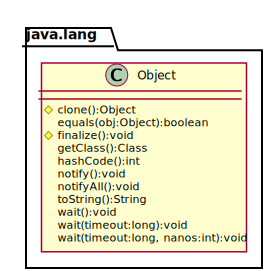

In [2]:
%%plantuml
@startuml
class java.lang.Object{
    #clone():Object
    equals(obj:Object):boolean
    #finalize():void
    getClass():Class
    hashCode():int
    notify():void
    notifyAll():void
    toString():String
    wait():void
    wait(timeout:long):void
    wait(timeout:long, nanos:int):void
}
@enduml

### HashCode

어느 존재이든 자신의 식별자가 있다. 학생은 학번, 한국인은 주민번호, 외국인은 여권번호 등이 그렇다.
객체는 이런 다른 것과 자신을 구별할 수 있는, 즉 id와 같이 다른 것과 식별할 수 있는 능력만 있다.

#### 해시코드 알아보기

객체를 사용할 때는 인식자가 있어야 한다. hash code값은 객체를 생성하면 JVM이 부여하는 정수 값 (주소값이 아니다)
객체가 생성한 HashCode값을 알아보자.

```java
System.identityHashCode()
```

Hello 객체 h1을 만들고, 객체의 HashCode를 16진수로 출력하여 확인할 수 있다.

함수 | 설명
-----|-----
System.identityHashCode() | hash code를 10진수로 출력
Integer.toHexString() | 10진수를 16진수로 변환

In [1]:
class Hello {};
Hello h1=new Hello();
System.out.println(Integer.toHexString(System.identityHashCode(h1)));

 class Hello {};
|  Added class Hello

 Hello h1=new Hello();
|  Added variable h1 of type Hello with initial value Hello@57fffcd7

 System.out.println(Integer.toHexString(System.identityHashCode(h1)));
57fffcd7



#### 해시코드와 Equals

hash code는 객체 고유의 번호이다. 그러나 중복될 수 있다는 점에 주의해야 한다.
**동일한 객체는 반드시 hash code가 같아야** 한다.

```java
if x.equals(y) then x.hashCode() == y.hashCode()
```

그러나, **다른 객체도 동일한 hash code 값을 가질 수** 있다. 다른 객체가 동일한 hash code를 가질 수 있는 이유는 hash code가 양의 정수 값으로 32비트로 제한되어 있기 때문에 그렇다고 생각하자.
* 요약하면, **두 객체가 같으면 hashCode는 같다 (그러나 그 반대도 참이지는 않는다)** 그렇기 때문에 객체 고유의 번호라고 할 수 없다.
* hash code 값이 동일하면 해시기반의 collection 클래스(HashMap, HashSet, Hashtable)에 문제가 발생한다.
* 따라서 equals()를 재정의하려면, 반드시 hashCode()함수를 구현해서 hash code를 다르게 해야 한다.

* 해쉬코드생성방법
    - ‘0’ 아닌 임의값을 hash로 사용 (여기서는 7)
    - 멤버값을 사용할 것 (무작위 값을 사용하면 다음 호출에 다른 값 반환하므로 일관성 해침)
    - 정수해쉬값에 31 연산
    - 해쉬값 반환

### equals

* 다형성은 어느 객체를 사용할 것인지 판별하는 것이 필요하다.
* 상속관계의 부모클래스와 자식클래스는 같지 않아야 한다.
* 판별하는 함수는 instanceof와 getClass()가 있다.
    * instanceOf는 부모클래스와 자식클래스를 동일한 객체로 본다.
    * getClass()는 부모클래스와 자식클래스라고 하더라도, 동일한 객체가 아니다.

* equals의 5가지 조건

특징 | 설명 | 예
-------|-------|-------
reflexivity | 자신과 비교하면 동일 | x.equals(x)는 true
symmetry | x=y이면 y=x | x.equals(y)이면 y.equals(x)
transitivity | x=y, y=z이면 z=x | x.equals(y) y.equals(z), z.equals(y)
consistency | 상태가 변경이 되어도 true | hashCode()가 다른 경우, 시점이 지나면 다를 수 있다.
non-nullity | x==not null | x.equals(null)

* equals를 override할 경우, hashcode도 override한다.

* reflexive

SeaTurtle st=new SeaTurtle();

st.equals(st);

* symmetric

Turtle t=new Turtle();

t.equals(st);

st.equals(t);

st.getClass();

t.getClass();

## 문제 클래스-1: hashCode(), equals()를 구현

Java 1.7부터는 Objects.hash()함수를 사용할 수 있다.
hash()에 멤버속성을 모두 넣어 해쉬코드를 생성하는 것이다.
```java
static int hash(Object... values)
```

In [52]:
class DogV3 implements Comparable, Cloneable {
    String name=null;
    String breed=null;
    private java.util.Date birthDay;
    public DogV3(String name, String breed) {
        this.name = name;
        this.breed = breed;
        this.birthDay = new Date();  //현재시점
    }
    @Override
    public boolean equals(Object o) {
        if (o == null) return false;
        if (!(o instanceof DogV3)) {
            return false;
        }
        DogV3 d = (DogV3) o;
        System.out.printf("EQUALS: name %s==%s breed %s==%s birth %s==%s %b",
        d.name,name,d.breed,breed,d.birthDay.toString(),
            birthDay.toString(),
        (d.name==name && d.breed.equals(breed) &&
            d.birthDay.equals(birthDay)));
        return d.name==name && d.breed.equals(breed) &&
            d.birthDay.equals(birthDay);
    }
    @Override
    //change from DogV2
    public int hashCode() {
        /*int hash = 7;   //an arbitrary non-zero constant integer value
        hash = 31 * hash + (null == name ? 0 : name.hashCode());
        hash = 31 * hash + (null == breed ? 0 : breed.hashCode());
        hash = 31 * hash + (null == birthDay ? 0 : birthDay.hashCode());
        return hash;*/
        return Objects.hash(name,breed,birthDay);
    }
    @Override
    //same as DogV2. only change in DogV3.
    protected Object clone() throws CloneNotSupportedException {
        try {
            DogV3 dogClone = (DogV3)super.clone();
            //Deep copy on birthDay
            dogClone.birthDay = (java.util.Date)(birthDay.clone());
            return dogClone;
        } catch (CloneNotSupportedException e) {
            e.printStackTrace();
            return null;
        }
    }
    @Override
    //same as DogV2 only change in DogV3.
    public int compareTo(Object o) {
        DogV3 d=(DogV3)o;
        return this.name.compareTo(d.name);
    }
    @Override
    //same as DogV2
    public String toString() {
        String msg=name+":"+breed+":"+birthDay.toString();
        return msg;
    }
}

 class DogV3 implements Comparable, Cloneable {
     String name=null;
     String breed=null;
     private java.util.Date birthDay;
     public DogV3(String name, String breed) {
         this.name = name;
         this.breed = breed;
         this.birthDay = new Date();  //현재시점
     }
     @Override
     public boolean equals(Object o) {
         if (o == null) return false;
         if (!(o instanceof DogV3)) {
             return false;
         }
         DogV3 d = (DogV3) o;

         d.name,name,d.breed,breed,d.birthDay.toString(),
             birthDay.toString(),
         (d.name==name && d.breed.equals(breed) &&
             d.birthDay.equals(birthDay)));
         return d.name==name && d.breed.equals(breed) &&
             d.birthDay.equals(birthDay);
     }
     @Override
     //change from DogV2
     public int hashCode() {
         /*int hash = 7;   //an arbitrary non-zero constant integer value
         hash = 31 * hash + (null == name ? 0 : name.hashCode());
         ha

In [ ]:
같은 데이터를 가지고 있는 객체이더라도, hashCode값이 다르면 

In [53]:
DogV3 d31=new DogV3("d31","Poodle");
DogV3 d32=new DogV3("d31","Poodle");
DogV3 d33=new DogV3("d3","Shih Tzu");
System.out.printf("d31 hashCode: %d %d\n", d31.hashCode(), System.identityHashCode(d31));
System.out.printf("d32 hashCode: %d %d\n", d32.hashCode(), System.identityHashCode(d32));
System.out.printf("d33 hashCode: %d %d\n", d33.hashCode(), System.identityHashCode(d33));

 DogV3 d31=new DogV3("d31","Poodle");
|  Added variable d31 of type DogV3 with initial value d31:Poodle:Sat Jun 02 16:26:10 KST 2018

 DogV3 d32=new DogV3("d31","Poodle");
|  Added variable d32 of type DogV3 with initial value d31:Poodle:Sat Jun 02 16:26:10 KST 2018

 DogV3 d33=new DogV3("d3","Shih Tzu");
|  Added variable d33 of type DogV3 with initial value d3:Shih Tzu:Sat Jun 02 16:26:10 KST 2018

hCode(d31));
d31 hashCode: 279244382 473581465
|  Expression value is: java.io.PrintStream@23faf8f2
|    assigned to temporary variable $39 of type PrintStream

hCode(d32));
d32 hashCode: 279243934 1316864772
|  Expression value is: java.io.PrintStream@23faf8f2
|    assigned to temporary variable $40 of type PrintStream

hCode(d33));
d33 hashCode: 1796068309 280744458
|  Expression value is: java.io.PrintStream@23faf8f2
|    assigned to temporary variable $41 of type PrintStream



In [54]:
System.out.printf("\n...d31 equals d32: %b",d31.equals(d32));

 System.out.printf("\n...d31 equals d32: %b",d31.equals(d32));
EQUALS: name d31==d31 breed Poodle==Poodle birth Sat Jun 02 16:26:10 KST 2018==Sat Jun 02 16:26:10 KST 2018 false
...d31 equals d32: false|  Expression value is: java.io.PrintStream@23faf8f2
|    assigned to temporary variable $42 of type PrintStream



## 문제 oo-8: 강의시간표를 구현한다.


### 문제
강의시간표는 빈 칸이 있을 수 있다. 강의명을 가져올 때, 강의가 없는 경우 문제가 될 수 있다.

### 해결

Subject와 NullSubject로 구분한다.

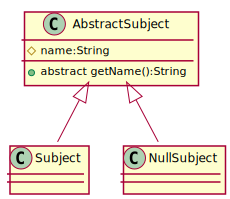

In [6]:
%%plantuml
@startuml
class AbstractSubject {
    #name:String
    +abstract getName():String
}
class Subject
class NullSubject
AbstractSubject <|-- Subject
AbstractSubject <|-- NullSubject
@enduml

In [71]:
public abstract class AbstractSubject {
   protected String name;
   public abstract String getName();
}

 public abstract class AbstractSubject {
    protected String name;
    public abstract String getName();
 }
|  Warning:
|  Modifier 'public'  not permitted in top-level declarations, ignored
|  public abstract class AbstractSubject {
|  ^-------------^
|  Added class AbstractSubject this error is corrected: 
|      Modifier 'public'  not permitted in top-level declarations, ignored
|      public abstract class AbstractSubject {
|      ^-------------^



In [72]:
public class Subject extends AbstractSubject {
    public Subject(String n) {
        this.name=n;
    }
    public String getName() {
        return this.name;
    }
}

 public class Subject extends AbstractSubject {
     public Subject(String n) {
         this.name=n;
     }
     public String getName() {
         return this.name;
     }
 }
|  Warning:
|  Modifier 'public'  not permitted in top-level declarations, ignored
|  public class Subject extends AbstractSubject {
|  ^----^
|  Added class Subject this error is corrected: 
|      Modifier 'public'  not permitted in top-level declarations, ignored
|      public class Subject extends AbstractSubject {
|      ^----^



In [73]:
public class NullSubject extends AbstractSubject {
    public String getName() {
        return "";
    }
}

 public class NullSubject extends AbstractSubject {
     public String getName() {
         return "";
     }
 }
|  Warning:
|  Modifier 'public'  not permitted in top-level declarations, ignored
|  public class NullSubject extends AbstractSubject {
|  ^----^
|  Added class NullSubject this error is corrected: 
|      Modifier 'public'  not permitted in top-level declarations, ignored
|      public class NullSubject extends AbstractSubject {
|      ^----^



In [74]:
AbstractSubject ns=new NullSubject();
ns.getName();

 AbstractSubject ns=new NullSubject();
|  Added variable ns of type AbstractSubject with initial value NullSubject@598067a5

 ns.getName();
|  Expression value is: ""
|    assigned to temporary variable $5 of type String



* 강의시간표에는 매 시간 강의가 있을 수 있다.
* 시간표를 2차원으로 구성한다.
    * 행은 8시간
    * 열은 5일
* NullSubject으로 초기화한다.

In [82]:
AbstractSubject[][] subjects=new NullSubject[8][5]; 
for(int i=0;i<subjects.length;i++) {
    for(int j=0;j<subjects[i].length;j++) {
        subjects[i][j]=new NullSubject();
        System.out.printf("subjects[%d][%d]=%s...",i,j,subjects[i][j].toString());
    }
}

 AbstractSubject[][] subjects=new NullSubject[8][5]; 
|  Modified variable subjects of type AbstractSubject[][] with initial value [[LNullSubject;@2b9627bc
|    Update overwrote variable subjects

 for(int i=0;i<subjects.length;i++) {
     for(int j=0;j<subjects[i].length;j++) {
         subjects[i][j]=new NullSubject();
g());
     }
 }
subjects[0][0]=REPL.$REPL11$NullSubject@4f970963...subjects[0][1]=REPL.$REPL11$NullSubject@61f8bee4...subjects[0][2]=REPL.$REPL11$NullSubject@7b49cea0...subjects[0][3]=REPL.$REPL11$NullSubject@887af79...subjects[0][4]=REPL.$REPL11$NullSubject@7fac631b...subjects[1][0]=REPL.$REPL11$NullSubject@5b87ed94...subjects[1][1]=REPL.$REPL11$NullSubject@6e0e048a...subjects[1][2]=REPL.$REPL11$NullSubject@5bc79255...subjects[1][3]=REPL.$REPL11$NullSubject@47ef968d...subjects[1][4]=REPL.$REPL11$NullSubject@23e028a9...subjects[2][0]=REPL.$REPL11$NullSubject@3dd4520b...subjects[2][1]=REPL.$REPL11$NullSubject@5ae63ade...subjects[2][2]=REPL.$REPL11$NullSubject@610694f1..

* 월요일 1교시는 'English'

In [84]:
subjects[0][0]

 subjects[0][0]
|  Expression value is: NullSubject@4f970963
|    assigned to temporary variable $18 of type AbstractSubject



* ??왜 ArrayStoreException

In [85]:
subjects[0][0]=new Subject("English");

 subjects[0][0]=new Subject("English");
|  java.lang.ArrayStoreException thrown: REPL.$REPL10$Subject
|        at (#24:1)



In [87]:
subjects[0][1]=new NullSubject();

 subjects[0][1]=new NullSubject();
|  Expression value is: NullSubject@68bbe345
|    assigned to temporary variable $21 of type AbstractSubject



In [88]:
subjects[0][1].getName();

 subjects[0][1].getName();
|  Expression value is: ""
|    assigned to temporary variable $22 of type String



In [91]:
for(AbstractSubject[] e:subjects) {
    for(AbstractSubject ee:e) {
        //ee=new NullSubject();
        System.out.printf("-%s-",ee.getName());
    }
}

 for(AbstractSubject[] e:subjects) {
     for(AbstractSubject ee:e) {
         //ee=new NullSubject();
         System.out.printf("-%s-",ee.getName());
     }
 }
--------------------------------------------------------------------------------


In [93]:
for(AbstractSubject[] e:subjects) {
    for(AbstractSubject ee:e) {
        System.out.println(ee);
    }
}

 for(AbstractSubject[] e:subjects) {
     for(AbstractSubject ee:e) {
         System.out.println(ee);
     }
 }
REPL.$REPL11$NullSubject@4f970963
REPL.$REPL11$NullSubject@68bbe345
REPL.$REPL11$NullSubject@7b49cea0
REPL.$REPL11$NullSubject@887af79
REPL.$REPL11$NullSubject@7fac631b
REPL.$REPL11$NullSubject@5b87ed94
REPL.$REPL11$NullSubject@6e0e048a
REPL.$REPL11$NullSubject@5bc79255
REPL.$REPL11$NullSubject@47ef968d
REPL.$REPL11$NullSubject@23e028a9
REPL.$REPL11$NullSubject@3dd4520b
REPL.$REPL11$NullSubject@5ae63ade
REPL.$REPL11$NullSubject@610694f1
REPL.$REPL11$NullSubject@43814d18
REPL.$REPL11$NullSubject@5c5a1b69
REPL.$REPL11$NullSubject@3701eaf6
REPL.$REPL11$NullSubject@627551fb
REPL.$REPL11$NullSubject@2b552920
REPL.$REPL11$NullSubject@2758fe70
REPL.$REPL11$NullSubject@1f36e637
REPL.$REPL11$NullSubject@578486a3
REPL.$REPL11$NullSubject@551aa95a
REPL.$REPL11$NullSubject@35d176f7
REPL.$REPL11$NullSubject@1dfe2924
REPL.$REPL11$NullSubject@6ebc05a6
REPL.$REPL11$NullSubject@6e6c3152
REPL